In [0]:
pip install category_encoders

Python interpreter will be restarted.
Collecting category_encoders
 Downloading category_encoders-2.6.0-py2.py3-none-any.whl (81 kB)
Requirement already satisfied: scikit-learn>=0.20.0 in /databricks/python3/lib/python3.8/site-packages (from category_encoders) (0.24.1)
Requirement already satisfied: numpy>=1.14.0 in /databricks/python3/lib/python3.8/site-packages (from category_encoders) (1.20.1)
Requirement already satisfied: statsmodels>=0.9.0 in /databricks/python3/lib/python3.8/site-packages (from category_encoders) (0.12.2)
Requirement already satisfied: scipy>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from category_encoders) (1.6.2)
Requirement already satisfied: patsy>=0.5.1 in /databricks/python3/lib/python3.8/site-packages (from category_encoders) (0.5.1)
Requirement already satisfied: pandas>=1.0.5 in /databricks/python3/lib/python3.8/site-packages (from category_encoders) (1.3.5)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=1.0.5->category_encoders) (2020.5)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=1.0.5->category_encoders) (2.8.1)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from patsy>=0.5.1->category_encoders) (1.15.0)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn>=0.20.0->category_encoders) (1.0.1)
Requirement already satisfied: threadpoolctl>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn>=0.20.0->category_encoders) (2.1.0)
Installing collected packages: category-encoders
Successfully installed category-encoders-2.6.0
Python interpreter will be restarted.

In [0]:
pip install imblearn

Python interpreter will be restarted.
Collecting imblearn
 Downloading imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Collecting imbalanced-learn
 Downloading imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
Requirement already satisfied: threadpoolctl>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from imbalanced-learn->imblearn) (2.1.0)
Requirement already satisfied: numpy>=1.17.3 in /databricks/python3/lib/python3.8/site-packages (from imbalanced-learn->imblearn) (1.20.1)
Collecting joblib>=1.1.1
 Downloading joblib-1.2.0-py3-none-any.whl (297 kB)
Requirement already satisfied: scipy>=1.3.2 in /databricks/python3/lib/python3.8/site-packages (from imbalanced-learn->imblearn) (1.6.2)
Collecting scikit-learn>=1.0.2
 Downloading scikit_learn-1.2.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
Installing collected packages: joblib, scikit-learn, imbalanced-learn, imblearn
 Attempting uninstall: joblib
 Found existing installation: joblib 1.0.1
 Not uninstalling joblib at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-4a790d85-d6e1-4d33-a1e2-54f6c07c9849
 Can't uninstall 'joblib'. No files were found to uninstall.
 Attempting uninstall: scikit-learn
 Found existing installation: scikit-learn 0.24.1
 Not uninstalling scikit-learn at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-4a790d85-d6e1-4d33-a1e2-54f6c07c9849
 Can't uninstall 'scikit-learn'. No files were found to uninstall.
Successfully installed imbalanced-learn-0.10.1 imblearn-0.0 joblib-1.2.0 scikit-learn-1.2.1
Python interpreter will be restarted.

In [0]:
# Here are some libraries that you may want to make use of. 
# Feel free to use other libraries as well

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import ensemble
from sklearn import feature_selection
from sklearn import linear_model

import warnings
warnings.filterwarnings("ignore")

### First load and inspect the Spotify charts data set.

In [0]:
#Load the spotify charts and sort the data.
df_sc = pd.read_csv('/dbfs/FileStore/shared_uploads/zeynep.acuner@utopiamusic.com/Spotify_Regional_Charts-2.csv', parse_dates=['Date'])
df_sc.sort_values(['Date', 'Region', 'Position'], inplace=True)
print(df_sc.shape)
df_sc.head()

(3441197, 7)
Out[2]:

,Position,Track Name,Artist,Streams,Date,Region,Track_ID
0,1,Chantaje,Shakira,253019,2017-01-01,ar,6mICuAdrwEjh6Y6lroV2Kg
1,2,Vente Pa' Ca,Ricky Martin,223988,2017-01-01,ar,7DM4BPaS7uofFul3ywMe46
2,3,Reggaetón Lento (Bailemos),CNCO,210943,2017-01-01,ar,3AEZUABDXNtecAOSC1qTfo
3,4,Safari,J Balvin,173865,2017-01-01,ar,6rQSrBHf7HlZjtcMZ4S4bO
4,5,Shaky Shaky,Daddy Yankee,153956,2017-01-01,ar,58IL315gMSTD37DOZPJ2hf


### Issues, inconsistencies, gaps, etc. do you notice about this Spotify charts data set?

In [0]:
def checks_sc(data):
  print('Summary of duplicates:', data.duplicated().sum())  
  print('------------------------------------------')
  print('Summary of NA values:', data.isnull().sum())
  print('------------------------------------------')
  print('Length of data:', min(data.Date), max(data.Date))
  print('------------------------------------------')
  print('Number of regions:', len(data.Region.value_counts()))
  print('------------------------------------------')
  print('Number of songs', len(data['Track Name'].value_counts()))
  print('------------------------------------------')
  print('Unique number of songs:', len(pd.unique(data['Track Name']))-1)
  print('------------------------------------------')
  print('Number of track IDs', len(data['Track_ID'].value_counts()))
  print('------------------------------------------')
  print('Unique number of track IDs:', len(pd.unique(data['Track_ID'])))
  print('------------------------------------------')
  print('Track names summary:', data['Track Name'].value_counts())

First, checking for duplicates, missing values, unique number of values and some value counts in the Spotify charts dataset. These have the potential to give insight on the issues around the Spotify charts dataset.

In [0]:
checks_sc(df_sc)

Summary of duplicates: 0
------------------------------------------
Summary of NA values: Position 0
Track Name 657
Artist 657
Streams 0
Date 0
Region 0
Track_ID 8
dtype: int64
------------------------------------------
Length of data: 2017-01-01 00:00:00 2018-01-09 00:00:00
------------------------------------------
Number of regions: 54
------------------------------------------
Number of songs 18597
------------------------------------------
Unique number of songs: 18597
------------------------------------------
Number of track IDs 21746
------------------------------------------
Unique number of track IDs: 21747
------------------------------------------
Track names summary: Shape of You 19365
Believer 16775
Despacito (Featuring Daddy Yankee) 16284
Something Just Like This 16194
Rockabye (feat. Sean Paul & Anne-Marie) 16177
 ... 
A Gente Não Se Aguenta - Ao Vivo 1
Pretty Babé 1
Rot 1
是有多寂寞 1
難得幸福 1
Name: Track Name, Length: 18597, dtype: int64

Dataset returns no duplicates but some null values in track and artist names. It is also a good idea to check for the range of each parameter to get a better understanding of each feature.
It can be seen that the unique number of track IDs are larger than the number of the initial count of tracks, which indicates there are some non-unique values among the track names and IDs or that one track name can be associated with more than one ID. Since the above check did not return duplicated values, one might indicate that there are different track names and/or IDs for some regions which results in different number of unique values for track names and IDs.

In [0]:
# Do a simple grouping to further examine the data.

df_sc_Date = df_sc.groupby(['Date', 'Track_ID','Track Name', 'Region', 'Streams']).sum()
df_sc_Date.drop(['Position'], axis=1, inplace=True)
df_sc_Date.sort_values(by='Streams', inplace=True)
df_sc_Date.sort_values(by='Date', inplace=True)

Let's check if a track name indeed corresponds to more than one Track ID by checking if there are more than 1 unique track name assocated with the tracks,

In [0]:
# Check if a track name corresponds to more than one track ID.

for track in df_sc['Track Name'].head(5):
  track_set = df_sc[df_sc['Track Name'] == track]
  print(len(track_set.Track_ID.unique()))

3
2
1
4
1

The above exercise shows that it does. We can pick one track, 'Chantaje' to further examine what is happening,

In [0]:
# From the above trial, it seems for example, for track Chantaje, there are three unique Spotify IDs.

track_set = df_sc[df_sc['Track Name'] == 'Chantaje']
track_set.Track_ID.unique()

Out[7]: array(['6mICuAdrwEjh6Y6lroV2Kg', '1WniHvhq9zTkny0WvGXX8o',
 '2aihVG2wlZJapDbB6eQ3sm'], dtype=object)

In [0]:
ch1 = track_set[track_set.Track_ID == '6mICuAdrwEjh6Y6lroV2Kg']

track_set[track_set.Track_ID == '6mICuAdrwEjh6Y6lroV2Kg'].head(3)

Out[8]:

,Position,Track Name,Artist,Streams,Date,Region,Track_ID
0,1,Chantaje,Shakira,253019,2017-01-01,ar,6mICuAdrwEjh6Y6lroV2Kg
261,62,Chantaje,Shakira,3245,2017-01-01,at,6mICuAdrwEjh6Y6lroV2Kg
537,138,Chantaje,Shakira,13216,2017-01-01,au,6mICuAdrwEjh6Y6lroV2Kg


In [0]:
ch2 = track_set[track_set.Track_ID == '1WniHvhq9zTkny0WvGXX8o']

track_set[track_set.Track_ID == '1WniHvhq9zTkny0WvGXX8o'].head(3)

Out[9]:

,Position,Track Name,Artist,Streams,Date,Region,Track_ID
1091044,19,Chantaje,Shakira,81602,2017-05-01,ar,1WniHvhq9zTkny0WvGXX8o
1091336,111,Chantaje,Shakira,2190,2017-05-01,at,1WniHvhq9zTkny0WvGXX8o
1091723,98,Chantaje,Shakira,4940,2017-05-01,be,1WniHvhq9zTkny0WvGXX8o


In [0]:
ch3 = track_set[track_set.Track_ID == '2aihVG2wlZJapDbB6eQ3sm']

track_set[track_set.Track_ID == '2aihVG2wlZJapDbB6eQ3sm'].head(3)

Out[10]:

,Position,Track Name,Artist,Streams,Date,Region,Track_ID
3299927,192,Chantaje,Marcos da costa,1205,2017-12-25,uy,2aihVG2wlZJapDbB6eQ3sm


From the above examples, we can see that there are two different cases where a track name is associated with more than one ID. The first one is a literal assignment of two unique IDs to one track which will be examined further below. The second case is that the track names can be common but the tracks themselves are related to different artists, raising the possibility of them being different songs, which results in a 'correct' case of a title having more than one associated ID.

In [0]:
print('Chantaje 1:', 'Start date of the track data in the charts:', min(ch1.Date), ',', 'End date of the track data in the charts:', max(ch1.Date),'.')
print('Chantaje 2:', 'Start date of the track data in the charts:', min(ch2.Date), ',', 'End date of the track data in the charts:', max(ch2.Date),'.')
print('Chantaje 3:', 'Start date of the track data in the charts:', min(ch3.Date), ',', 'End date of the track data in the charts:', max(ch3.Date),'.')

Chantaje 1: Start date of the track data in the charts: 2017-01-01 00:00:00 , End date of the track data in the charts: 2018-01-09 00:00:00 .
Chantaje 2: Start date of the track data in the charts: 2017-05-01 00:00:00 , End date of the track data in the charts: 2017-05-25 00:00:00 .
Chantaje 3: Start date of the track data in the charts: 2017-12-25 00:00:00 , End date of the track data in the charts: 2017-12-25 00:00:00 .

The time spans differ for different tracks which might create issues while merging with different data sets. The final example further shows that some tracks may enter the charts only once, which would make it harder to track their performance once merged with other datasets.

Let's now group by both track name and artist to see how it affects the above issue.

In [0]:
df_sc_Artist = df_sc.groupby(['Date', 'Track Name', 'Artist', 'Track_ID']).sum()
df_sc_Artist.reset_index(inplace=True)

In [0]:
print('Number of track names', ',', len(df_sc_Artist['Track Name'].value_counts()), 'Number of unique track names:', ',', len(df_sc_Artist['Track Name'].unique()))
print('Number of track IDs', ',', len(df_sc_Artist['Track_ID'].value_counts()), 'Number of unique track IDs:', ',', len(df_sc_Artist['Track_ID'].unique()))

Number of track names , 18597 Number of unique track names: , 18597
Number of track IDs , 21738 Number of unique track IDs: , 21738

The unique number of Track IDs are lower, but still not a one to one match with the track names.

### Now load and inspect the Billboard chart data set.
As additional context the following is taken from Billboard's website:

"THE CHART WEEK

Generally, charts reflect sales and airplay between Friday and Thursday of any given week. Mixed-data charts, such as the Billboard Hot 100, also use an airplay cycle of Monday through Saturday.

Charts are refreshed every Tuesday on Billboard.com and reflect the date of the Billboard issue in which they appear; online-only charts display the same corresponding date.

The printed magazine first reaches newsstands on Saturday. Each issue is dated based on the end of its publication week. Thus, the Billboard that reaches newsstands on Saturday, March 19, for example, is dated that day."

In [0]:
#Load the billboard charts.
df_bb = pd.read_csv('/dbfs/FileStore/shared_uploads/zeynep.acuner@utopiamusic.com/Billboard_Charts.csv', sep=',', parse_dates=['WeekID'])
print(df_bb.shape)
df_bb.head()

(17887, 12)
Out[14]:

,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,spotify_genre,spotify_track_id,spotify_track_popularity
0,2017-01-07,1,Starboy,The Weeknd Featuring Daft Punk,StarboyThe Weeknd Featuring Daft Punk,1,2.0,1,14,"['canadian contemporary r&b', 'canadian pop', ...",7MXVkk9YMctZqd1Srtv4MB,86.0
1,2017-01-07,2,Black Beatles,Rae Sremmurd Featuring Gucci Mane,Black BeatlesRae Sremmurd Featuring Gucci Mane,1,1.0,1,15,"['hip hop', 'melodic rap', 'pop rap', 'rap', '...",6fujklziTHa8uoM5OQSfIo,78.0
2,2017-01-07,3,Closer,The Chainsmokers Featuring Halsey,CloserThe Chainsmokers Featuring Halsey,1,3.0,1,21,"['electropop', 'pop', 'tropical house']",7BKLCZ1jbUBVqRi2FVlTVw,86.0
3,2017-01-07,4,24K Magic,Bruno Mars,24K MagicBruno Mars,1,4.0,4,11,NaN,NaN,NaN
4,2017-01-07,5,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,Juju On That Beat (TZ Anthem)Zay Hilfigerrr & ...,2,8.0,5,13,[],1lItf5ZXJc1by9SbPeljFd,65.0


### Issues, inconsistencies, gaps, etc. do you notice about this Billboard chart data set?

In [0]:
def checks_bb(data):
  print('Summary of duplicates:', data.duplicated().sum())   
  print('------------------------------------------')
  print('Summary of NA values:', data.isnull().sum())
  print('------------------------------------------')
  print('Length of data:', min(data.WeekID), max(data.WeekID))
  print('------------------------------------------')
  print('Number of songs', len(data['Song'].value_counts()))
  print('------------------------------------------')
  print('Unique number of songs:', len(pd.unique(data['Song'])))
  print('------------------------------------------')
  print('Weeks on chart summary:', data['Weeks on Chart'].value_counts())
  print('------------------------------------------')
  print('Song names summary:', data['Song'].value_counts())

In [0]:
checks_bb(df_bb)

Summary of duplicates: 411
------------------------------------------
Summary of NA values: WeekID 0
Week Position 0
Song 0
Performer 0
SongID 0
Instance 0
Previous Week Position 2168
Peak Position 0
Weeks on Chart 0
spotify_genre 812
spotify_track_id 1345
spotify_track_popularity 1345
dtype: int64
------------------------------------------
Length of data: 2017-01-07 00:00:00 2019-12-28 00:00:00
------------------------------------------
Number of songs 1632
------------------------------------------
Unique number of songs: 1632
------------------------------------------
Weeks on chart summary: 1 1674
2 1184
3 1021
4 931
5 856
6 813
7 772
8 742
9 714
10 692
11 669
12 631
13 606
14 570
15 548
16 523
17 487
18 468
19 448
20 396
21 272
22 243
23 221
24 200
25 195
26 177
27 165
28 143
29 132
30 117
31 112
32 104
33 100
34 93
35 86
36 75
37 72
38 68
39 65
40 57
41 53
42 49
43 47
44 42
45 39
46 34
47 34
48 33
50 28
49 28
51 26
52 19
53 4
54 3
55 2
56 2
57 1
58 1
Name: Weeks on Chart, dtype: int64
------------------------------------------
Song names summary: Happier 106
Sunflower (Spider-Man: Into The Spider-Verse) 106
High Hopes 104
Without Me 104
Lucid Dreams 96
 ... 
Flaws And Sins 1
Once An Addict (Interlude) 1
Close 1
Maze 1
She 1
Name: Song, Length: 1632, dtype: int64

It can be seen that there are both duplicates and null values for Spotify track ID, Spotify track popularity and genre as well as previous week position. It seems that the Billboard chart songs cannot be matched with Spotify IDs consistently or that for some of the track there are no Spotify IDs, which may cause the NULL values and duplicates observed in this data set. If a track didn't chart the previous week, the entry is expected to be NULL as well, which may cause the high number of NULL values in the Previous Week Position.

### The data frame below synthesizes the Billboard charts table and the Spotify charts table. 
Based on the statement above about how the Billboard chart week is defined, the combined data set is indexed on Spotify Track ID and chart week Saturday, and considers all Spotify tracks with ID's that charted that week. Spotify chart position is ignored. The features are the sum of chart streams (on chart days) for the songs on Spotify charts that week. (E.g., es_lag_0 is sum of Spanish Spotify chart streams for the indexed week and song). We also include the Spotify chart features for a week prior to the chart week. (E.g., au_lag_1 is the sum of Australian Spotify chart streams for the indexed song and the week prior to the indexed week.) As our target (bin_targ) we are interested in predicting when a song will place on the Billboard Hot 100, not its position.

In [0]:
df = pd.read_csv('/dbfs/FileStore/shared_uploads/zeynep.acuner@utopiamusic.com/Billboard_Spotify_Combined.csv', index_col = ['chart_saturday', 'Track_ID'])
print(df.shape)
df.head()

(181550, 119)
Out[17]:

ar_lag_0 
 at_lag_0 
 au_lag_0 
 be_lag_0 
 bo_lag_0 
 br_lag_0 
 ca_lag_0 
 ch_lag_0 
 cl_lag_0 
 co_lag_0 
 cr_lag_0 
 cz_lag_0 
 de_lag_0 
 dk_lag_0 
 do_lag_0 
 ec_lag_0 
 ee_lag_0 
 es_lag_0 
 fi_lag_0 
 fr_lag_0 
 gb_lag_0 
 global_lag_0 
 gr_lag_0 
 gt_lag_0 
 hk_lag_0 
 hn_lag_0 
 hu_lag_0 
 id_lag_0 
 ie_lag_0 
 is_lag_0 
 it_lag_0 
 jp_lag_0 
 lt_lag_0 
 lu_lag_0 
 lv_lag_0 
 mx_lag_0 
 my_lag_0 
 nl_lag_0 
 no_lag_0 
 nz_lag_0 
 ... 
 hn_lag_1 
 hu_lag_1 
 id_lag_1 
 ie_lag_1 
 is_lag_1 
 it_lag_1 
 jp_lag_1 
 lt_lag_1 
 lu_lag_1 
 lv_lag_1 
 mx_lag_1 
 my_lag_1 
 nl_lag_1 
 no_lag_1 
 nz_lag_1 
 pa_lag_1 
 pe_lag_1 
 ph_lag_1 
 pl_lag_1 
 pt_lag_1 
 py_lag_1 
 se_lag_1 
 sg_lag_1 
 sk_lag_1 
 sv_lag_1 
 tr_lag_1 
 tw_lag_1 
 us_lag_1 
 uy_lag_1 
 Week Position 
 Instance 
 Previous Week Position 
 Peak Position 
 Weeks on Chart 
 spotify_track_popularity 
 Song 
 Performer 
 SongID 
 spotify_genre 
 bin_targ 
 
 
 chart_saturday 
 Track_ID 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2017-01-14 
 000xYdQfIZ4pDmBGzQalKU 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 989796.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0 
 
 
 00C47repvBYiWwkfE99faH 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 2810.0 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0 
 
 
 00Ro1lnV3V6i87aY4t8Q43 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1024.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0 
 
 
 00X2yv2vrtritPt2CZnUTZ 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 303501.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0 
 
 
 00ZvHVUdHcZNAwxGSKTGCk 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 82060.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 56890.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0 
 
 
 
 5 rows × 119 columns

### Combining the two datasets.

In [0]:
def checks_df(data):
  data.reset_index(inplace=True)
  print('Summary of duplicates:', data.duplicated().sum())   
  print('------------------------------------------')
  print('Summary of NA values:', data.isnull().sum())
  print('------------------------------------------')
  print('Length of data:', min(data.chart_saturday), max(data.chart_saturday))
  print('------------------------------------------')
  print('Number of songs', len(data['Track_ID'].value_counts()))
  print('------------------------------------------')
  print('Unique number of songs:', len(pd.unique(data['Track_ID'])))
  print('------------------------------------------')
  print('Summary of Billboard chart listings:', data['bin_targ'].value_counts())
  print('------------------------------------------')
  print('Weeks on chart summary:', data['Weeks on Chart'].value_counts())

In [0]:
checks_df(df)

Summary of duplicates: 0
------------------------------------------
Summary of NA values: chart_saturday 0
Track_ID 0
ar_lag_0 0
at_lag_0 0
au_lag_0 0
 ... 
Song 174785
Performer 174785
SongID 174785
spotify_genre 174789
bin_targ 0
Length: 121, dtype: int64
------------------------------------------
Length of data: 2017-01-14 2017-12-30
------------------------------------------
Number of songs 21141
------------------------------------------
Unique number of songs: 21141
------------------------------------------
Summary of Billboard chart listings: 0 179223
1 2327
Name: bin_targ, dtype: int64
------------------------------------------
Weeks on chart summary: 1.0 194
2.0 139
3.0 108
4.0 97
7.0 97
8.0 96
5.0 94
10.0 93
14.0 92
11.0 91
6.0 91
13.0 90
9.0 90
12.0 88
15.0 83
16.0 80
17.0 77
18.0 74
19.0 69
20.0 59
21.0 39
22.0 35
23.0 29
25.0 27
24.0 26
26.0 24
27.0 20
28.0 19
33.0 17
29.0 16
30.0 16
31.0 15
34.0 15
32.0 15
36.0 12
35.0 12
39.0 11
37.0 11
38.0 10
40.0 7
41.0 7
42.0 6
43.0 6
44.0 4
45.0 4
46.0 4
47.0 4
48.0 4
49.0 3
50.0 3
51.0 2
52.0 2
Name: Weeks on Chart, dtype: int64

There are many missing values possibly arising from the issues described above around the Spotify track ID and track titles as well as artists. Some duplicates might have resulted from these issues as well. The Billboard chart shown above has data for 2 years, whereas the Spotify charts data has only one, which may cause further issues when merged. It can also be seen that the target class is highly imbalanced. If the duplicates in the Billboard chart are not dropped before merging, this would have also contributed to the missing values in the combined dataset.

### Use the combined data set provided (Billboard_Spotify_Combined.csv) when answering questions 4-6. 
### Q4. As a visualization of the data, plot a (weekly) time series showing the proportion of tracks that appear on the US Spotify regional chart in a given week that also appear on the Billboard Hot 100 chart in that same week.

In [0]:
# Select tracks that charted on both Spotify and Billboard.

# All tracks.

allTracks = df.groupby(['chart_saturday'])['Track_ID'].count()
allTracks = allTracks.to_frame().reset_index()

# Tracks that charted on Billboard.

bbHot100 = df[df.bin_targ == 1]
bbHot100_count = bbHot100.groupby(['chart_saturday'])['Track_ID'].count()
bbHot100_count = bbHot100_count.to_frame().reset_index()

# Tracks that charted on Spotify US.

spotifyUS = df[df.us_lag_0 != 0]
spotifyUS_count = spotifyUS.groupby(['chart_saturday'])['Track_ID'].count()
spotifyUS_count = spotifyUS_count.to_frame().reset_index()

# Tracks that charted on both.

bbHot100 = df[df.bin_targ == 1]
bbHot100_spotifyUS = bbHot100[bbHot100.us_lag_0 != 0]

bbHot100_spotifyUS_grpd = bbHot100_spotifyUS.groupby(['chart_saturday'])['Track_ID'].count()
bbHot100_spotifyUS_grpd = bbHot100_spotifyUS_grpd.to_frame().reset_index()

Out[21]:

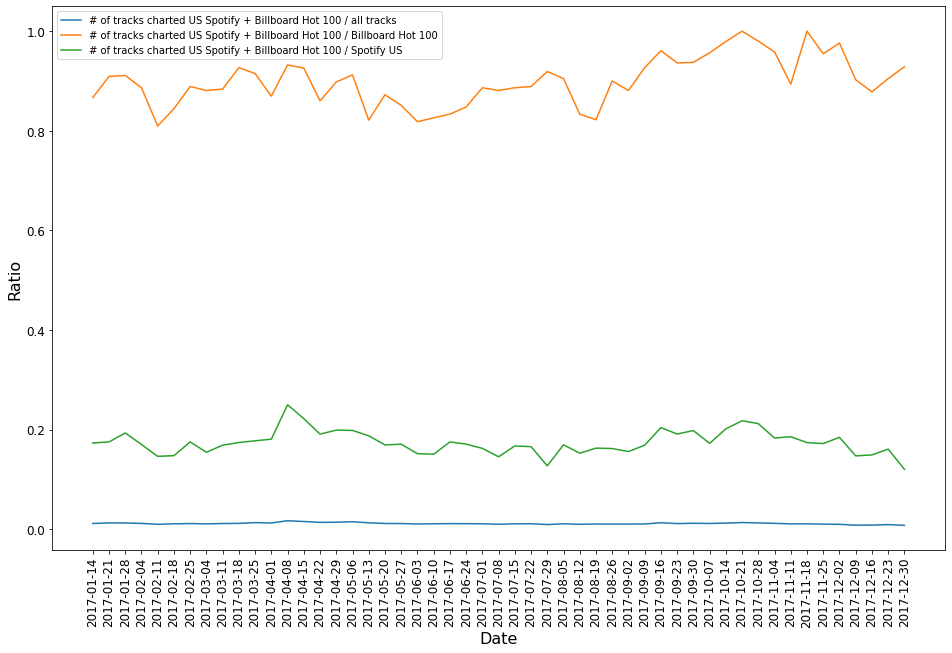

Text(0, 0.5, 'Ratio')

In [0]:
fig, ax = plt.subplots(figsize=(16,10))

plt.plot(allTracks.chart_saturday, bbHot100_spotifyUS_grpd.Track_ID/allTracks.Track_ID, label='# of tracks charted US Spotify + Billboard Hot 100 / all tracks')
plt.plot(allTracks.chart_saturday, bbHot100_spotifyUS_grpd.Track_ID/bbHot100_count.Track_ID, label='# of tracks charted US Spotify + Billboard Hot 100 / Billboard Hot 100')
plt.plot(allTracks.chart_saturday, bbHot100_spotifyUS_grpd.Track_ID/spotifyUS_count.Track_ID, label='# of tracks charted US Spotify + Billboard Hot 100 / Spotify US')


plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=12)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('Ratio', fontsize=16)

The above plot shows that there is a limited number of tracks that charted on the Spotify lists that also charts on Billboard, which would make the intersection of the below merged data set quite small. Nearly all of the tracks that chart on both Spotify and Billboard also chart in Billboard. However, there is a very low percentage of all tracks that can make the charts at all.

### Which regional Spotify charts are most helpful for predicting what will appear in the Billboard Hot 100?

In [0]:
dfLr = df.drop(['chart_saturday', 'Week Position', 'Instance', 'Previous Week Position', 'spotify_track_popularity', 'Song', 'Performer', 'SongID', 'spotify_genre', 'Peak Position', 'Weeks on Chart'], axis=1)

dfLr.head()

Out[22]:

,Track_ID,ar_lag_0,at_lag_0,au_lag_0,be_lag_0,bo_lag_0,br_lag_0,ca_lag_0,ch_lag_0,cl_lag_0,co_lag_0,cr_lag_0,cz_lag_0,de_lag_0,dk_lag_0,do_lag_0,ec_lag_0,ee_lag_0,es_lag_0,fi_lag_0,fr_lag_0,gb_lag_0,global_lag_0,gr_lag_0,gt_lag_0,hk_lag_0,hn_lag_0,hu_lag_0,id_lag_0,ie_lag_0,is_lag_0,it_lag_0,jp_lag_0,lt_lag_0,lu_lag_0,lv_lag_0,mx_lag_0,my_lag_0,nl_lag_0,no_lag_0,...,ec_lag_1,ee_lag_1,es_lag_1,fi_lag_1,fr_lag_1,gb_lag_1,global_lag_1,gr_lag_1,gt_lag_1,hk_lag_1,hn_lag_1,hu_lag_1,id_lag_1,ie_lag_1,is_lag_1,it_lag_1,jp_lag_1,lt_lag_1,lu_lag_1,lv_lag_1,mx_lag_1,my_lag_1,nl_lag_1,no_lag_1,nz_lag_1,pa_lag_1,pe_lag_1,ph_lag_1,pl_lag_1,pt_lag_1,py_lag_1,se_lag_1,sg_lag_1,sk_lag_1,sv_lag_1,tr_lag_1,tw_lag_1,us_lag_1,uy_lag_1,bin_targ
0,000xYdQfIZ4pDmBGzQalKU,0.0,0.0,0.0,0.0,0.0,989796.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,00C47repvBYiWwkfE99faH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2810.0,0.0,0.0,0
2,00Ro1lnV3V6i87aY4t8Q43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,00X2yv2vrtritPt2CZnUTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,191321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,00ZvHVUdHcZNAwxGSKTGCk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56890.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


To be able to understand which features best predict tracks appearing on the Billboard charts, one can carry out a feature selection analysis.

In [0]:
# Prepare the data for feature selection.

y = dfLr.bin_targ
X = dfLr.drop(['bin_targ', 'Track_ID'], axis=1)

features = pd.DataFrame(X.columns)

Chose not to include the chart Saturday dates since the history of the listings on the charts are already given by lag_1 variables. Next, the train-test set for standardization and normalization are formed below. Getting the dataset closer to a normal distribution with a lower variance is expected to increase the model performance.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2,  stratify=y)

# Min-max scaler.

min_max_scaler = MinMaxScaler().fit(X_train)
XNorm = min_max_scaler.transform(X)
XNorm = pd.DataFrame(XNorm)

# Standard scaler.

std_scaler = StandardScaler().fit(XNorm)
XStd = std_scaler.transform(X)

XNormStd = pd.DataFrame(XStd) # normalized and standardized dataset.

# Train test split for normalized and standardized data.

X_train, X_test, y_train, y_test =  train_test_split(XNormStd, y, test_size = 0.2, shuffle=False)

In order to examine the feature importances, the Random Forest Classifier is chosen. It is known to work better for large and high dimensional datasets and therefore is a good first approach to the problem. Grid-search step is omitted for now, as it takes a long time. Permutation based feature selection is applied where features are repeatedly shuffled and re-fitted each time to estimate the importance ranking.

In [0]:
# Training the classifier:

from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

Out[31]:

RandomForestClassifier(random_state=0) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestClassifier RandomForestClassifier(random_state=0)

In [0]:
# Computing the importances:

from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=features)
#forest_importances.sort_values(by='importance', inplace=True)

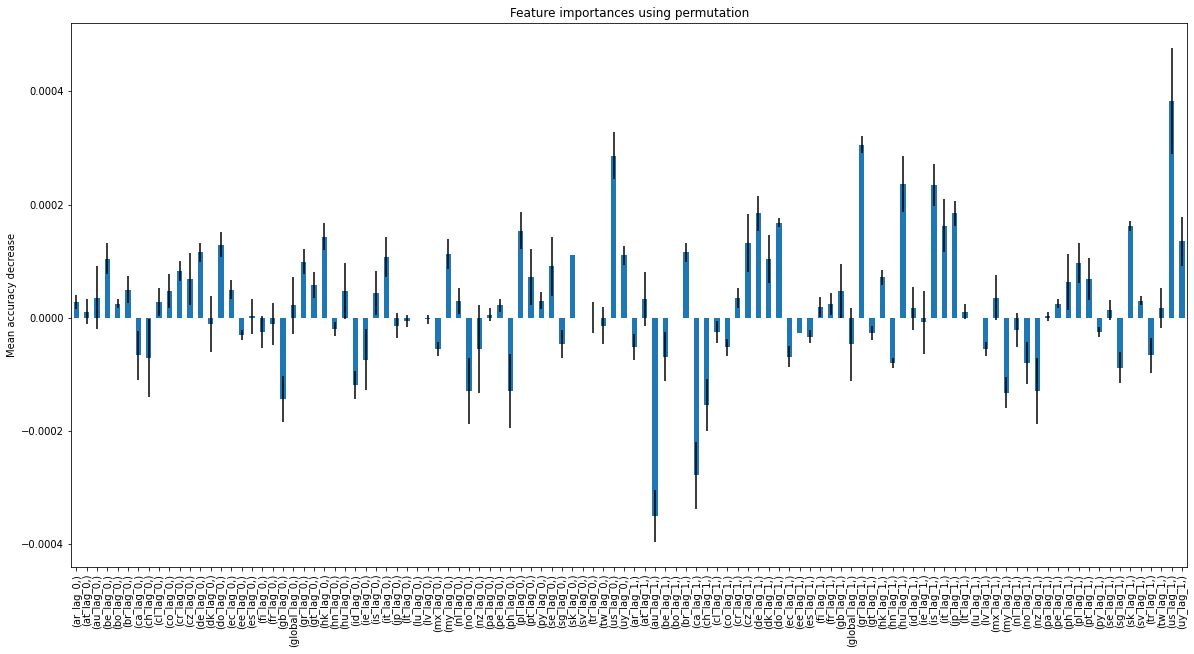

In [0]:
# Plotting the importance per feature:

fig, ax = plt.subplots(figsize=(20,10))

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean accuracy decrease")
plt.show()

In [0]:
# List and sort the outcome. Highest absolute values give the most important features in this analysis.

forest_importances = pd.DataFrame(forest_importances).reset_index()
forest_importances.rename(columns = { 'index': 'feature', 0 : 'importance'}, inplace=True)
forest_importances.sort_values(by='importance', inplace=True)
forest_importances

Out[35]:

,feature,feature,importance
56,56,"(au_lag_1,)",-0.000350
60,60,"(ca_lag_1,)",-0.000278
61,61,"(ch_lag_1,)",-0.000154
20,20,"(gb_lag_0,)",-0.000143
90,90,"(my_lag_1,)",-0.000132
...,...,...,...
83,83,"(is_lag_1,)",0.000234
80,80,"(hu_lag_1,)",0.000237
52,52,"(us_lag_0,)",0.000286
76,76,"(gr_lag_1,)",0.000306


According to the above analysis shows that US and GBR have high predictivity on Billboard charts which is to be expected since these countries have a lot of contribution to the overall functioning of the music scene in both producing music and content as well as consumption. Expectedly, global charts are also important, but surprisingly not more important than US or GBR. Australia and Canada are also important predictor countries, which makes sense due to above criteria and due to the fact that all are English speaking countries which might have high domination on the music culture currently.

Next, we are making use of an outlier detection algorithm to further the exploration of the data, with the expectation finding the outlier group containing the most of the tracks that charted in the BillboardHot 100.

In [0]:
# Apply isolation forest for outlier detection.

from sklearn.ensemble import IsolationForest

# Fit the isolation forest model.

isolationForest = IsolationForest(n_estimators = 100, contamination = 0.2, max_samples ='auto')
isolationForestPred = isolationForest.fit_predict(X)

print("Number of outliers detected: {}".format(isolationForestPred[isolationForestPred == -1].sum()))
print("Number of normal samples detected: {}".format(isolationForestPred[isolationForestPred == 1].sum()))

# Form a dataset containing the results.

dfLrImportance_outliers = pd.concat([dfLr, pd.DataFrame(isolationForestPred)], axis=1)
dfLrImportance_outliers.rename(columns = { 0 : 'Outliers'}, inplace=True)

# Separate outlier and normal samples for further examination.

outliers = dfLrImportance_outliers[dfLrImportance_outliers.Outliers == -1]
normal = dfLrImportance_outliers[dfLrImportance_outliers.Outliers == 1]

print('------------------------------------------')
print('Percentage of Billboard charted tracks in the detected outliers:', round((outliers.bin_targ.value_counts()[1]/len(outliers.bin_targ))*100), '%')
print('Percentage of duplicated Track IDs in the detected outliers:', round((len(outliers.Track_ID.duplicated())/ (len(outliers) + len(normal))) * 100), '%')
print('------------------------------------------')
print('Percentage of Billboard charted tracks in the detected normal sample:', round((normal.bin_targ.value_counts()[1]/len(normal.bin_targ))*100), '%')
print('Percentage of duplicated Track IDs in the detected normal sample:', round((len(normal.Track_ID.duplicated())/ (len(outliers) + len(normal))) * 100), '%')

Number of outliers detected: -36301
Number of normal samples detected: 145249
------------------------------------------
Percentage of Billboard charted tracks in the detected outliers: 5 %
Percentage of duplicated Track IDs in the detected outliers: 20 %
------------------------------------------
Percentage of Billboard charted tracks in the detected normal sample: 0 %
Percentage of duplicated Track IDs in the detected normal sample: 80 %

The above analysis show that detected outliers contain 5% of the tracks that made it on the Billboard chart while the normal tracks remained at 0%. This shows that a simple outlier detection algorithm can detect better performing tracks. Also it shows that there are much more duplicated track IDs in the normal dataset.

### Build and evaluate a model which predicts whether or not a song is on the Billboard Hot 100 using Spotify charts data as features.

Since there are a lot of missing values for features  'Week Position', 'Instance', 'Previous Week Position', 'spotify_track_popularity', 'Song', 'Performer', 'SongID', 'spotify_genre', 'Peak Position' and 'Weeks on Chart' (for example 177378 out of 179705 for week position), they will be omitted during this exercise as well.

Below, first the track IDs are encoded so that they can be used in the modelling and then, the target feature is balanced, in an attempt to improve the performance of the models used.

In [0]:
# Here, to keep the information around the track IDs, they are encoded so that they can be used in the following modeling exercises.

import category_encoders as ce

dfLrEncoded = ce.BinaryEncoder(cols=['Track_ID']).fit(dfLr).transform(dfLr)

# Get a dataset that only contains the features for linear regression (not encoded, for future comparison).

dfLrImportance_features = dfLr.drop(['bin_targ'], axis=1)

y = dfLr.bin_targ
X = dfLrEncoded.drop(['bin_targ'], axis=1)

# Train-test split for the encoded dataset to be used in balancing.

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=None, stratify=y)

In [0]:
# As the target feature is highly imbalanced, an oversampler is applied below.

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(XNormStd, y)

y.value_counts()

# Train test split the balanced data set to be used in training the PCA.

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=None, stratify=y)

Choosing to apply PCA since we are dealing with a high dimensional data and it could be helpful to both select for the components that explain most of the variability as well as to reduce the dimension size.

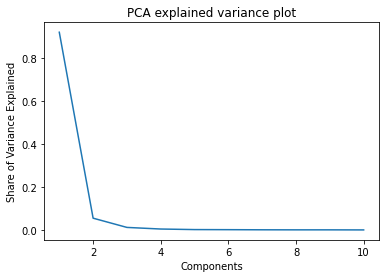

In [0]:
from sklearn.decomposition import PCA

# Try with 10 components
pca = PCA(n_components=10, whiten=True)
pca.fit(X_train)

#extract the explained variance
explained_variance = pca.explained_variance_ratio_

x = np.arange(1,len(explained_variance)+1)
plt.plot(x, explained_variance)

# Plot variances as explained by different components.

plt.ylabel('Share of Variance Explained')
plt.title("PCA explained variance plot")
plt.xlabel("Components")
plt.show()

In [0]:
# Looks like 2 components are enough to explain the majority of the variance. Fit the model and train-test split with PCA transformation.

pca = PCA(n_components=2, whiten=True) 
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, shuffle=None, stratify=y)

Finally a logistic regression model and a ridge classifier is fitted to the data.

In [0]:
# Logistic regression classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean accuracy:', model.score(X_test, y_test))
                       
# Compute R-squared score
r2_test = r2_score(y_test, y_pred)
print("R-squared score on test set:", r2_test)

# Compute mean squared error
mse_test = mean_squared_error(y_test, y_pred)
print("Mean squared error on test set:", mse_test)

Mean accuracy: 0.9060840066062581
R-squared score on test set: 0.6243360264250324
Mean squared error on test set: 0.0939159933937419

A ridge classifier is also used in an attempt to reduce possible overfitting:

In [0]:
# A Ridge classifier gives the below results.

from sklearn.linear_model import RidgeClassifierCV

clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
clf.score(X_test, y_test)
print('Best alpha:',clf.alpha_)

print('Mean accuracy:', clf.score(X_test, y_test))
                       
# Compute R-squared score
r2_test = r2_score(y_test, y_pred)
print("R-squared score on test set:", r2_test)

# Compute mean squared error
mse_test = mean_squared_error(y_test, y_pred)
print("Mean squared error on test set:", mse_test)

Best alpha: 1.0
Mean accuracy: 0.8558675177431594
R-squared score on test set: 0.6243360264250324
Mean squared error on test set: 0.0939159933937419

With the application of PCA for dimension reduction and class balancing, once can achieve a good accuracy on logistic regression results. The performance with Ridge classifier is similar to the logistic regression as the Ridge classifier defaulted to alpha = 1 which corresponds to other basic linear models.

### How does model performance differ when being restricted to features from Spotify charts from the week directly associated with the Billboard Hot 100, as compared with the week immediately preceding?

The model is tried with only _lag_0s features.

In [0]:
# Run the model with only *_lag_0s

X_nolag = X.iloc[:,:54]

pca = PCA(n_components=2, whiten=True) 
X_nolag_pca = pca.fit_transform(X_nolag)

X_train, X_test, y_train, y_test = train_test_split(X_nolag_pca, y, shuffle=None, stratify=y)

In [0]:
# Logistic regression for only *_lag_0s

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Mean accuracy:', model.score(X_test, y_test))
                       
# Compute R-squared score
r2_test = r2_score(y_test, y_pred)
print("R-squared score on test set:", r2_test)

# Compute mean squared error
mse_test = mean_squared_error(y_test, y_pred)
print("Mean squared error on test set:", mse_test)

Mean accuracy: 0.9066308083738785
R-squared score on test set: 0.626523233495514
Mean squared error on test set: 0.0933691916261215

Performance seems slightly worse without the lagged features.

The performance of the model decreases when the data related to the week before the charting week is removed. This is not surprising since the popularity of the tracks generally trend upwards in a few consecutive weeks before finally saturating and eventually decreasing. Hence, it can be argued that making it into the Spotify charts, especially two weeks in a row, is a strong indication of being listed in the BillboardHot 100 chart.

Only a minority of the tracks in the Spotify charts actually make it into BillboardHot 100 chart which results in a highly imbalanced dataset. When this problem is combined with the possible mismatchings or multiple matchings of Spotify IDs to the 
tracks in the two datasets, the combined dataset ends up with some missing information. The combined dataset is also affected by the fact that the time spans of each dataset are different and the shortest one is defaulted to.

These problems can be mitigated via class balancing as carried out above besides some simple steps of data cleansing. Ideally, the structure to keep track of song names and Spotify IDs could be built for the Billboard dataset. These steps may in return help to retain more information in the combined dataset which would lead to better predictions.